In [25]:
#📦Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [26]:
#📄Load Data
df = pd.read_csv("healthcare_dataset.csv")
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [27]:
#📊Initial Exploration
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isna().sum())


Shape: (55500, 15)
Columns: Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')
Data Types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object
Missing Values:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance P

In [28]:
#🔍Check for Duplicates
print("Duplicate Rows:", df.duplicated().sum())
df[df.duplicated()]



Duplicate Rows: 534


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [29]:
#Remove duplicate rows
df = df.drop_duplicates()
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


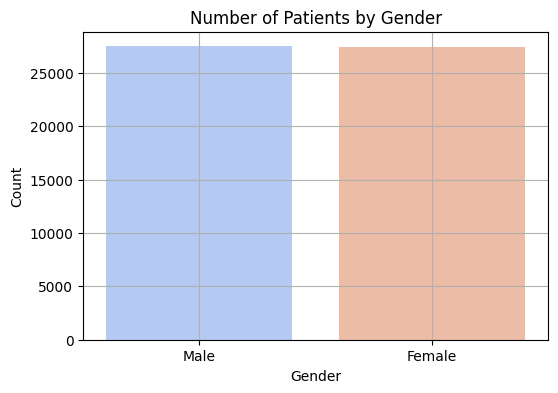

In [30]:
#📈Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title("Number of Patients by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()


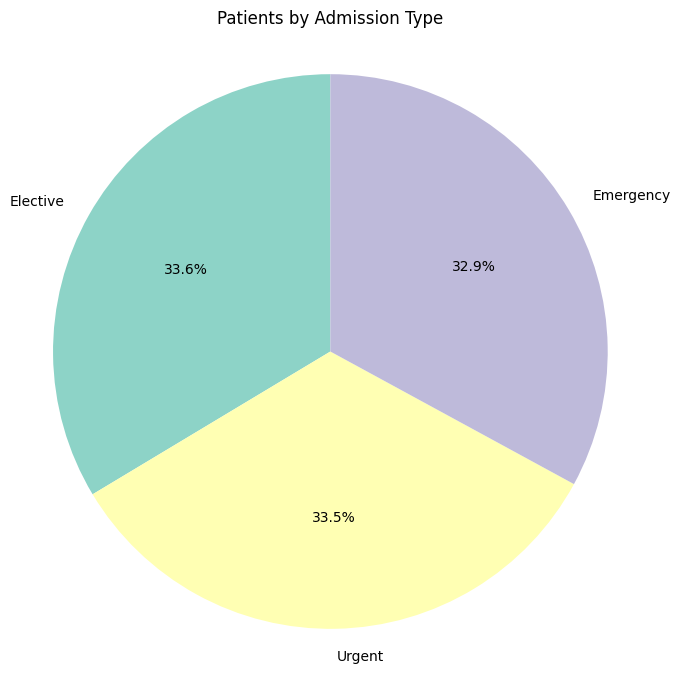

In [31]:
#🥧Admission Type Pie Chart
Admission_Type = df['Admission Type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(Admission_Type.values, labels=Admission_Type.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Set3.colors)
plt.title("Patients by Admission Type")
plt.axis('equal')
plt.tight_layout()
plt.show()


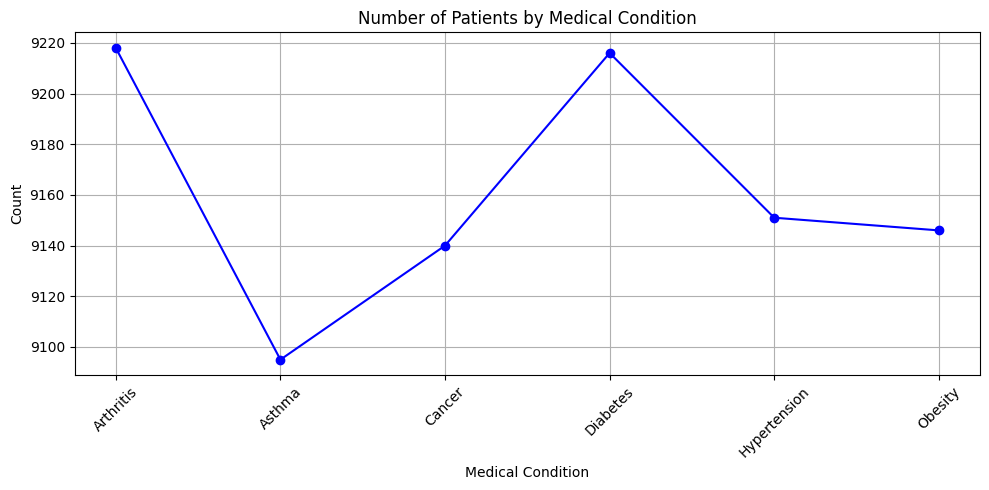

In [32]:
#📉 Medical Condition Line Plot
condition_counts = df['Medical Condition'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(condition_counts.index, condition_counts.values, marker='o', linestyle='-', color='blue')
plt.title("Number of Patients by Medical Condition")
plt.xlabel("Medical Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()


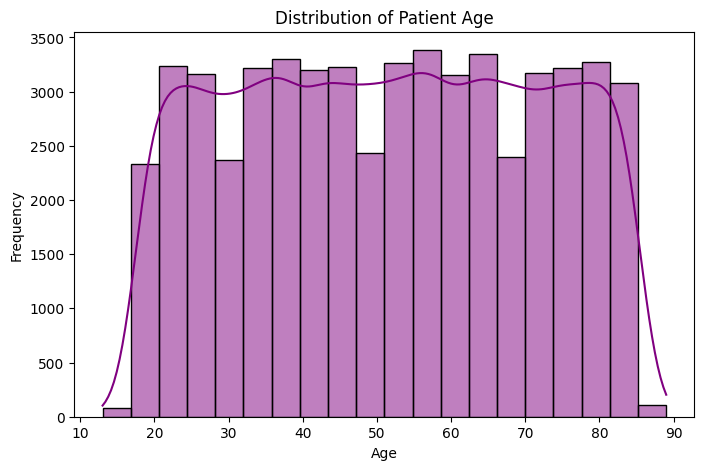

In [33]:
#🧓Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=20, color='purple')
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [34]:
#📆 Date Conversion and Stay Duration
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days


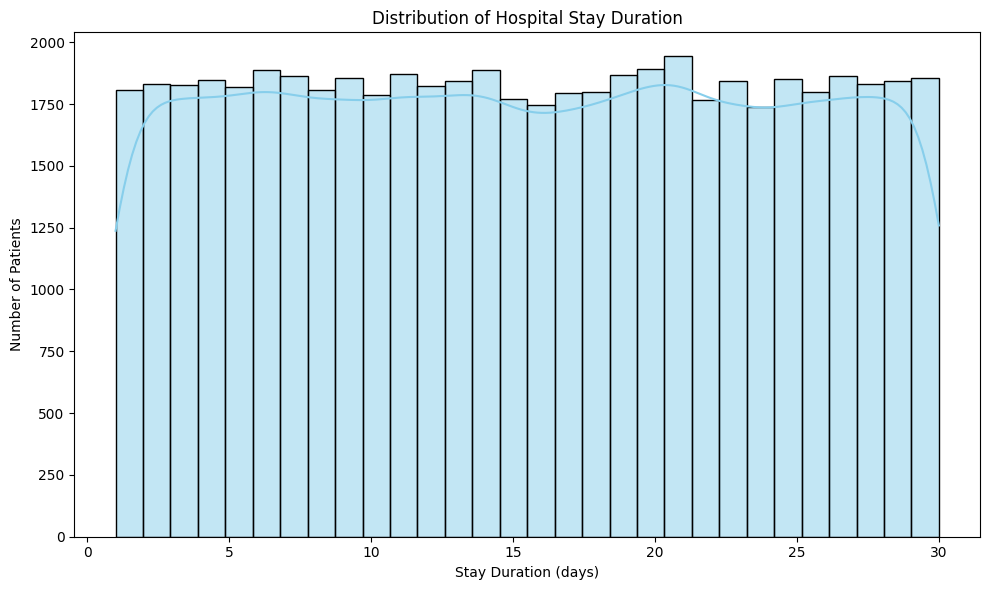

In [35]:
#🛌Stay Duration Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Stay Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Hospital Stay Duration')
plt.xlabel('Stay Duration (days)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


In [36]:
# # Get the top 5 insurance providers by average billing
# top5_providers = avg_billing.head(5).index

# # Filter original DataFrame for just those providers
# top5_df = df[df['Insurance Provider'].isin(top5_providers)]

# # Create a boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=top5_df, x='Billing Amount', y='Insurance Provider', palette="Set2")
# plt.title("Billing Distribution for Top 5 Insurance Providers")
# plt.xlabel("Billing Amount")
# plt.ylabel("Insurance Provider")
# plt.tight_layout()
# plt.show()


In [37]:
#🧹Drop Irrelevant Columns
df.drop(['Name', 'Doctor', 'Hospital', 'Room Number', 'Insurance Provider','Blood Type','Medication','Gender'], axis=1, inplace=True)


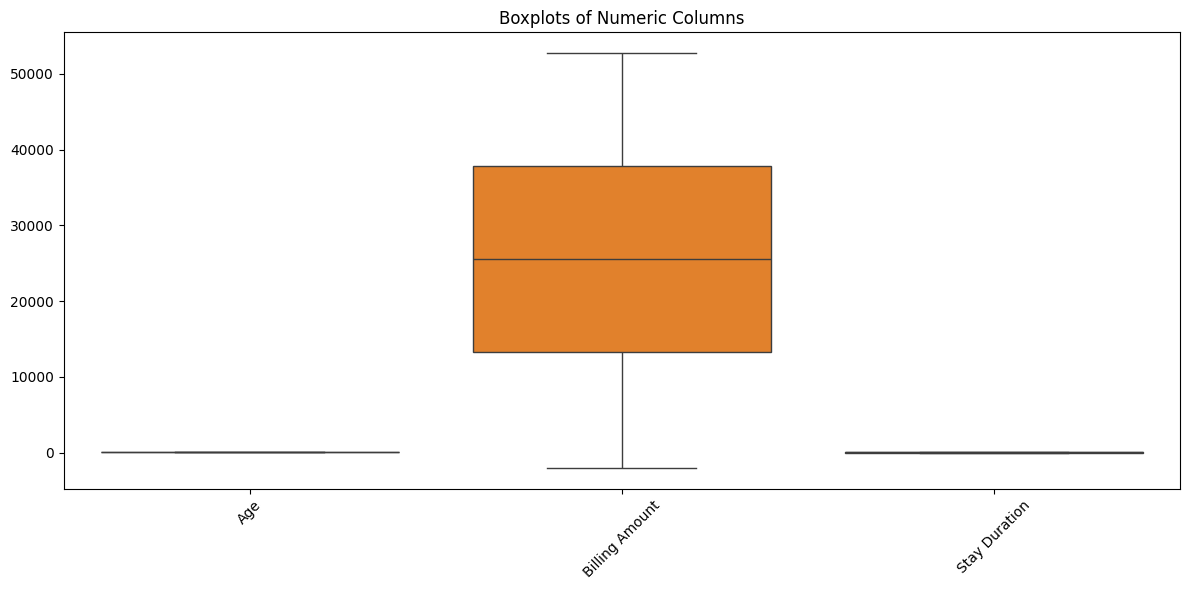

In [38]:
#📦Boxplot of Numeric Columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numeric Columns')
plt.tight_layout()
plt.show()

In [39]:

dfe= pd.get_dummies(df[['Admission Type', 'Test Results', 'Medical Condition']],dtype=int)
dfe

,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity
0,0,0,1,0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55495,1,0,0,1,0,0,0,1,0,0,0,0
55496,1,0,0,0,0,1,0,0,0,0,0,1
55497,0,0,1,1,0,0,0,0,0,0,1,0
55498,1,0,0,1,0,0,1,0,0,0,0,0


In [40]:
df_1=pd.concat([dfe,df],axis=True)
df_1

,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Age,Medical Condition,Date of Admission,Billing Amount,Admission Type,Discharge Date,Test Results,Stay Duration
0,0,0,1,0,0,1,0,0,1,0,0,0,30,Cancer,2024-01-31,18856.281306,Urgent,2024-02-02,Normal,2
1,0,1,0,0,1,0,0,0,0,0,0,1,62,Obesity,2019-08-20,33643.327287,Emergency,2019-08-26,Inconclusive,6
2,0,1,0,0,0,1,0,0,0,0,0,1,76,Obesity,2022-09-22,27955.096079,Emergency,2022-10-07,Normal,15
3,1,0,0,1,0,0,0,0,0,1,0,0,28,Diabetes,2020-11-18,37909.782410,Elective,2020-12-18,Abnormal,30
4,0,0,1,1,0,0,0,0,1,0,0,0,43,Cancer,2022-09-19,14238.317814,Urgent,2022-10-09,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,1,0,0,1,0,0,0,1,0,0,0,0,42,Asthma,2020-08-16,2650.714952,Elective,2020-09-15,Abnormal,30
55496,1,0,0,0,0,1,0,0,0,0,0,1,61,Obesity,2020-01-23,31457.797307,Elective,2020-02-01,Normal,9
55497,0,0,1,1,0,0,0,0,0,0,1,0,38,Hypertension,2020-07-13,27620.764717,Urgent,2020-08-10,Abnormal,28
55498,1,0,0,1,0,0,1,0,0,0,0,0,43,Arthritis,2019-05-25,32451.092358,Elective,2019-05-31,Abnormal,6


In [41]:
df_1.drop(['Admission Type', 'Test Results', 'Medical Condition','Billing Amount','Stay Duration'],axis=1,inplace=True)
df_1

,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Age,Date of Admission,Discharge Date
0,0,0,1,0,0,1,0,0,1,0,0,0,30,2024-01-31,2024-02-02
1,0,1,0,0,1,0,0,0,0,0,0,1,62,2019-08-20,2019-08-26
2,0,1,0,0,0,1,0,0,0,0,0,1,76,2022-09-22,2022-10-07
3,1,0,0,1,0,0,0,0,0,1,0,0,28,2020-11-18,2020-12-18
4,0,0,1,1,0,0,0,0,1,0,0,0,43,2022-09-19,2022-10-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,1,0,0,1,0,0,0,1,0,0,0,0,42,2020-08-16,2020-09-15
55496,1,0,0,0,0,1,0,0,0,0,0,1,61,2020-01-23,2020-02-01
55497,0,0,1,1,0,0,0,0,0,0,1,0,38,2020-07-13,2020-08-10
55498,1,0,0,1,0,0,1,0,0,0,0,0,43,2019-05-25,2019-05-31


In [42]:
#🔍 Clustering Setup
x = df_1.select_dtypes(exclude=['datetime'])


In [43]:
x

,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Age
0,0,0,1,0,0,1,0,0,1,0,0,0,30
1,0,1,0,0,1,0,0,0,0,0,0,1,62
2,0,1,0,0,0,1,0,0,0,0,0,1,76
3,1,0,0,1,0,0,0,0,0,1,0,0,28
4,0,0,1,1,0,0,0,0,1,0,0,0,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,1,0,0,1,0,0,0,1,0,0,0,0,42
55496,1,0,0,0,0,1,0,0,0,0,0,1,61
55497,0,0,1,1,0,0,0,0,0,0,1,0,38
55498,1,0,0,1,0,0,1,0,0,0,0,0,43


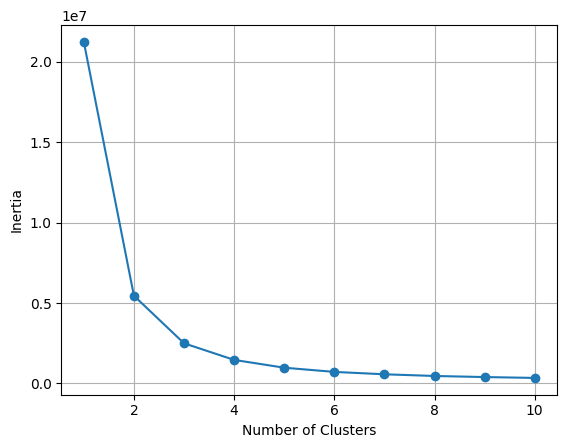

In [44]:
#🔵  Elbow Method
from sklearn.cluster import KMeans

var = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init="k-means++", random_state=42)
    model.fit(x)
    var.append(model.inertia_)

plt.plot(range(1, 11), var, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [45]:
#🧪 Apply KMeans and Visualize
kmeans_model=KMeans(n_clusters=5, init='k-means++', random_state=42)
x["clusters"]=kmeans_model.fit_predict(x)



In [46]:
#📊Cluster Summary
cluster_summary = x.groupby("clusters").mean()
print(cluster_summary)


          Admission Type_Elective  Admission Type_Emergency  \
clusters                                                      
0                        0.325175                  0.333599   
1                        0.339685                  0.323474   
2                        0.343208                  0.331447   
3                        0.333006                  0.335955   
4                        0.339722                  0.321402   

          Admission Type_Urgent  Test Results_Abnormal  \
clusters                                                 
0                      0.341226               0.336082   
1                      0.336841               0.337220   
2                      0.325345               0.337018   
3                      0.331039               0.330771   
4                      0.338876               0.336152   

          Test Results_Inconclusive  Test Results_Normal  \
clusters                                                   
0                          0.32

In [47]:
x["clusters"].value_counts()

clusters
2    11308
0    11277
3    11189
4    10644
1    10548
Name: count, dtype: int64

In [48]:


# # Assume you already have the clustered dataset with a 'clusters' column
# # Example (replace this with your actual DataFrame):
# # df = pd.read_csv("your_clustered_data.csv")

# # Define cluster labels based on your interpretation
cluster_labels = {
    0: 'ChronicCare_Obese_MixedAdmission',
    1: 'RoutineCare_StableConditions',
    2: 'Diagnostics_ActiveMonitoring',
    3: 'HighRisk_Hypertension_ComplexCases',
    4: 'UrgentCare_DiabetesRelated'
}

# # Add the Cluster_Label column
# x['Cluster_Label'] = x['clusters'].map(cluster_labels)

# # Preview the updated DataFrame
# print(x[['clusters', 'Cluster_Label']])


In [49]:
#🧠 Classification Preparation
data1 = x.drop(['clusters'],axis=1).values
data2 = x['clusters'].values



In [50]:
data1

array([[ 0,  0,  1, ...,  0,  0, 30],
       [ 0,  1,  0, ...,  0,  1, 62],
       [ 0,  1,  0, ...,  0,  1, 76],
       ...,
       [ 0,  0,  1, ...,  1,  0, 38],
       [ 1,  0,  0, ...,  0,  0, 43],
       [ 0,  0,  1, ...,  0,  0, 53]], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data1,data2, test_size=0.3, random_state=42)




In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [53]:
#🤖 Train Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=7)
nav = BernoulliNB()
svc = SVC()
tree=DecisionTreeClassifier()
forest=RandomForestClassifier()

models = [knn,nav,svc,tree,forest]
accuracies = []

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print(f"Performance evaluation of: {model}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("="*100)
    
    accuracies.append(accuracy_score(y_test, y_pred))


Performance evaluation of: KNeighborsClassifier(n_neighbors=7)

Confusion Matrix:
 [[3387    0    4    0    0]
 [   0 3194    0    0    0]
 [   0    0 3351    0    0]
 [   0    0    0 3388    0]
 [   0    0    0    0 3166]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3391
           1       1.00      1.00      1.00      3194
           2       1.00      1.00      1.00      3351
           3       1.00      1.00      1.00      3388
           4       1.00      1.00      1.00      3166

    accuracy                           1.00     16490
   macro avg       1.00      1.00      1.00     16490
weighted avg       1.00      1.00      1.00     16490

Performance evaluation of: BernoulliNB()

Confusion Matrix:
 [[1746    0 1645    0    0]
 [   0  623    0 2571    0]
 [1626    0 1725    0    0]
 [   0  686    0 2702    0]
 [ 751  363  753 1299    0]]

Classification Report:
               precision    recall  

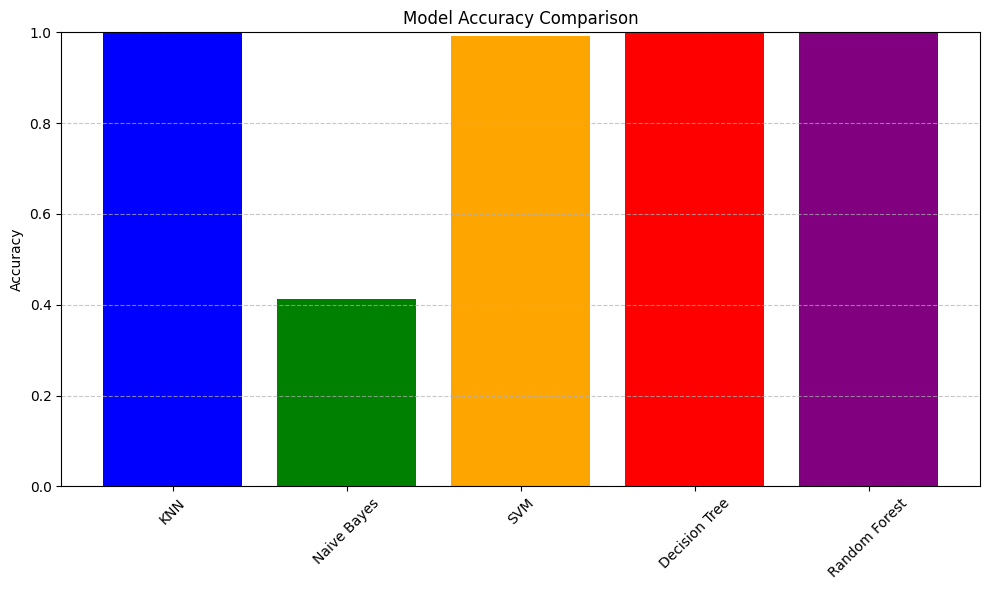

In [54]:
#📊 Compare Accuracies
#📊 Updated Accuracy Comparison with All Models
model_names = ['KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
colors =['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(model_names,accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [55]:
x.columns

Index(['Admission Type_Elective', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Test Results_Abnormal',
       'Test Results_Inconclusive', 'Test Results_Normal',
       'Medical Condition_Arthritis', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity', 'Age',
       'clusters'],
      dtype='object')

In [56]:
#print(svc.predict(scaler.transform([[0,0,1,0,0,1,0,0,1,0,0,0,0,42]])))


In [57]:
print(f"{(pred:=svc.predict(scaler.transform([[0,1,0,0,1,0,0,1,0,0,0,0,42]]))[0])} {cluster_labels.get(pred, 'Unknown Cluster')}")

1 RoutineCare_StableConditions


In [58]:
print(f"{(pred:=svc.predict(scaler.transform([[1,0,1,0,0,1,0,0,1,0,0,0,59]]))[0])} {cluster_labels.get(pred, 'Unknown Cluster')}")

2 Diagnostics_ActiveMonitoring


In [59]:
import pickle
pickle.dump(model,open('svc_model.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))